#### Q-1 Select a dataset or datasets of your choice. 
- Apply a classification algorithm and then evaluate the classification model as it is done in “classification_metrics.ipynb”.

source: http://archive.ics.uci.edu/ml/datasets/Wine+Quality

In [58]:
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

% matplotlib inline

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
pd.set_option('display.max_columns', 100)

In [60]:
df = pd.read_csv('winequality-red.csv')

In [61]:
df.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
715,7.2,0.49,0.18,2.7,0.069,13.0,34.0,0.99670,3.29,0.48,9.2,6
27,7.9,0.43,0.21,1.6,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
1028,7.2,0.34,0.21,2.5,0.075,41.0,68.0,0.99586,3.37,0.54,10.1,6
1160,10.6,0.36,0.57,2.3,0.087,6.0,20.0,0.99676,3.14,0.72,11.1,7
431,7.8,0.55,0.35,2.2,0.074,21.0,66.0,0.99740,3.25,0.56,9.2,5


In [62]:
# quality over 5, normalizing quality to binary
df['overfive'] = (df.quality > 5).astype(int)

In [63]:
df.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,overfive
262,8.0,0.520,0.03,1.7,0.070,10.0,35.0,0.99575,3.34,0.57,10.0,5,0
44,6.8,0.670,0.02,1.8,0.050,5.0,11.0,0.99620,3.48,0.52,9.5,5,0
710,10.6,1.025,0.43,2.8,0.080,21.0,84.0,0.99850,3.06,0.57,10.1,5,0
388,7.8,0.460,0.26,1.9,0.088,23.0,53.0,0.99810,3.43,0.74,9.2,6,1
1528,7.9,0.290,0.49,2.2,0.096,21.0,59.0,0.99714,3.31,0.67,10.1,6,1


In [64]:
X = df.iloc[:,0:-2]
y = df.iloc[:,-1]

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [66]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_class = logreg.predict(X_test)
#y_pred_class predicts 1 and 0

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [67]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.7575


In [68]:
y_test.value_counts()

max(y_test.mean(), 1-y_test.mean())

# calculating null accuracy
y_test.value_counts().head(1)/len(y_test)

1    215
0    185
Name: overfive, dtype: int64

0.5375

1    0.5375
Name: overfive, dtype: float64

### confusion matrix

In [69]:
confusion = metrics.confusion_matrix(y_test, y_pred_class)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

# TN FP  - (T)specificity  (F) false positive
# FN TP  - (T)sensitivity
#    * precision

print(confusion)

[[134  51]
 [ 46 169]]


In [70]:
# classification error = Total false / Total true
print((FP + FN) / float(TP + TN + FP + FN))
print(1 - metrics.accuracy_score(y_test, y_pred_class))

0.2425
0.2425


In [71]:
# sensitivity (aka: true positive rate)
print(TP / float(TP + FN))
print(metrics.recall_score(y_test, y_pred_class))

0.786046511628
0.786046511628


In [72]:
# specificity (true negative)
print(TN / float(TN + FP))

0.724324324324


In [73]:
# false positive rate
print(FP / float(TN + FP))

0.275675675676


In [74]:
# precision
print(TP / float(TP + FP))
print(metrics.precision_score(y_test, y_pred_class))

0.768181818182
0.768181818182


### Logistic regression - adjusting classificiation threshold

In [75]:
y_pred_class[0:10]
logreg.predict(X_test)[0:10]

array([1, 0, 1, 0, 1, 0, 0, 1, 0, 0])

array([1, 0, 1, 0, 1, 0, 0, 1, 0, 0])

In [76]:
logreg.predict_proba(X_test)[0:10,:]

array([[ 0.31610978,  0.68389022],
       [ 0.73174635,  0.26825365],
       [ 0.06517001,  0.93482999],
       [ 0.59212302,  0.40787698],
       [ 0.28622327,  0.71377673],
       [ 0.84859946,  0.15140054],
       [ 0.56828991,  0.43171009],
       [ 0.2291421 ,  0.7708579 ],
       [ 0.83836126,  0.16163874],
       [ 0.85135368,  0.14864632]])

In [77]:
y_pred_prob = logreg.predict_proba(X_test)[:, 1]
y_pred_prob[0:10]

array([ 0.68389022,  0.26825365,  0.93482999,  0.40787698,  0.71377673,
        0.15140054,  0.43171009,  0.7708579 ,  0.16163874,  0.14864632])

(array([ 35.,  50.,  54.,  55.,  36.,  57.,  61.,  52.]),
 array([ 0.08312215,  0.19512717,  0.30713219,  0.41913722,  0.53114224,
         0.64314726,  0.75515229,  0.86715731,  0.97916233]),
 <a list of 8 Patch objects>)

(0, 1)

Text(0.5,1,'Histogram of predicted probabilities')

Text(0.5,0,'Predicted probability of diabetes')

Text(0,0.5,'Frequency')

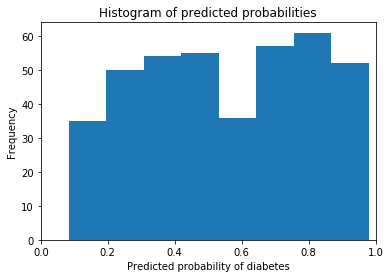

In [78]:
# histogram of predicted probabilities
plt.hist(y_pred_prob, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')

In [79]:
from sklearn.preprocessing import binarize
y_pred_class = binarize([y_pred_prob], 0.3)[0]

In [80]:
print(confusion)

[[134  51]
 [ 46 169]]


In [81]:
# new confusion matrix based on 0.3
print(metrics.confusion_matrix(y_test, y_pred_class))

[[ 73 112]
 [ 11 204]]


### ROC Curve

(0.0, 1.0)

(0.0, 1.0)

Text(0.5,1,'ROC curve for diabetes classifier')

Text(0.5,0,'False Positive Rate (1 - Specificity)')

Text(0,0.5,'True Positive Rate (Sensitivity)')

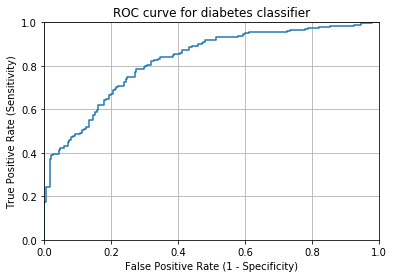

In [82]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [83]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [84]:
evaluate_threshold(0.5)

Sensitivity: 0.786046511628
Specificity: 0.724324324324


In [85]:
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.824915147706


In [86]:
from sklearn.cross_validation import cross_val_score
cross_val_score(logreg, X, y, cv=10, scoring='roc_auc').mean()

0.81084804229674268